# Social Media Sentiments Analysis

### Import Libraries 

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
import re
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Collection 

In [3]:
##predicting The Sentiment

#### Data Gathering 

In [4]:
data = pd.read_csv("Sentimentdataset.csv")
data

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,target
0,0,0,0,0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,0
1,1,1,1,1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,1
2,2,2,2,2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,0
3,3,3,3,3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,1
4,4,4,4,4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,727,727,728,732,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,1
728,728,728,729,733,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,1
729,729,729,730,734,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,1
730,730,730,731,735,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,1


In [5]:
df = data[["Text","target"]]
df

,Text,target
0,Enjoying a beautiful day at the park! ...,0
1,Traffic was terrible this morning. ...,1
2,Just finished an amazing workout! 💪 ...,0
3,Excited about the upcoming weekend getaway! ...,1
4,Trying out a new recipe for dinner tonight. ...,2
...,...,...
727,Collaborating on a science project that receiv...,1
728,Attending a surprise birthday party organized ...,1
729,Successfully fundraising for a school charity ...,1
730,"Participating in a multicultural festival, cel...",1


In [6]:
df.shape

(732, 2)

In [7]:
df.isna().sum()

Text      0
target    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    732 non-null    object
 1   target  732 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


### Text preprocessing 

In [9]:
#Cleaning and preprocessing the text data by removing special characters, stopwords.
#performing tokenization.

def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace('\t',' ').replace('\\',' ')
    return clean_text

def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)                      
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return final_data

def join_list(data):
    return " ".join(data)

In [10]:
clean_text = df.Text.apply(remove_spaces)
clean_text = clean_text.apply(expand_text)
clean_text = clean_text.apply(handling_accented)
clean_text = clean_text.apply(clean_data)
clean_text = clean_text.apply(lemmatization)
clean_text = clean_text.apply(join_list)

### Feature Extraction 

In [11]:
count_vect = CountVectorizer()                              
x = count_vect.fit_transform(clean_text).toarray()
y = df["target"].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [13]:
print(f"X train: {x_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {x_test.shape}")
print(f"y test: {y_test.shape}")

X train: (585, 2231)
y train: (585,)
X test: (147, 2231)
y test: (147,)


### Model Selection

In [14]:
#Logistic Regression

#### Model training and Model evaluation 

In [15]:
model_details = []
training_accuracy_list = []
testing_accuracy_list = []

In [16]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)
model_details.append("Decision_Tree")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



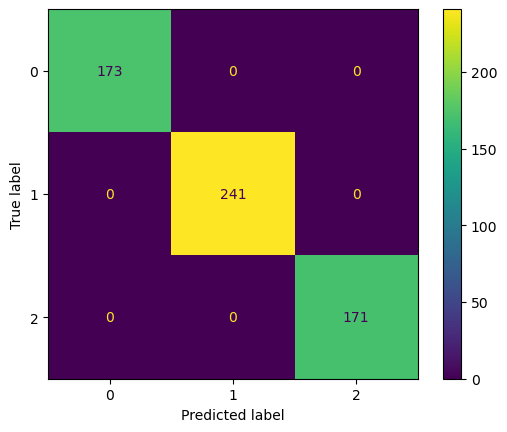

In [17]:
y_pred_train = dt_clf.predict(x_train)
plot_confusion_matrix(dt_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6802721088435374

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        41
           1       0.79      0.68      0.73        71
           2       0.56      0.69      0.62        35

    accuracy                           0.68       147
   macro avg       0.67      0.68      0.67       147
weighted avg       0.69      0.68      0.68       147



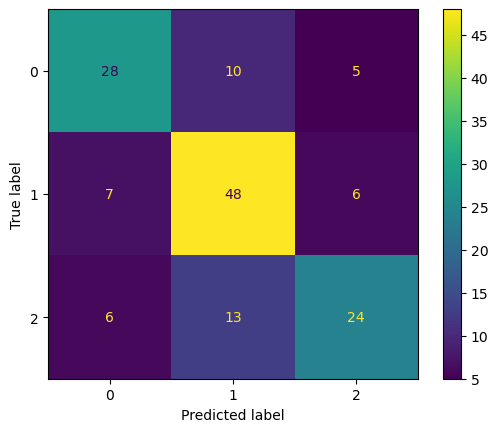

In [18]:
y_pred_test = dt_clf.predict(x_test)
plot_confusion_matrix(dt_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [19]:
dt_model = DecisionTreeClassifier(random_state=11)
hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [20]:
gscv_dt_clf.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       random_state=11)

In [21]:
gscv_dt_clf.fit(x_train, y_train)
model_details.append("Decision_Tree With Hyperparameter tuning")

0.6358974358974359

              precision    recall  f1-score   support

           0       0.39      0.85      0.54        80
           1       0.95      0.54      0.69       423
           2       0.44      0.93      0.60        82

    accuracy                           0.64       585
   macro avg       0.59      0.77      0.61       585
weighted avg       0.80      0.64      0.65       585



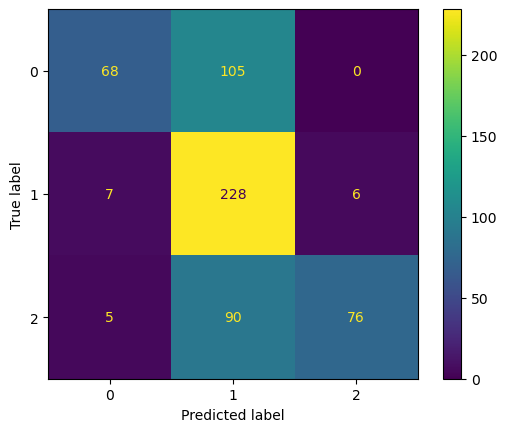

In [22]:
y_pred_train = gscv_dt_clf.predict(x_train)
plot_confusion_matrix(gscv_dt_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.5782312925170068

              precision    recall  f1-score   support

           0       0.28      0.86      0.42        14
           1       0.95      0.51      0.67       113
           2       0.35      0.75      0.48        20

    accuracy                           0.58       147
   macro avg       0.53      0.71      0.52       147
weighted avg       0.80      0.58      0.62       147



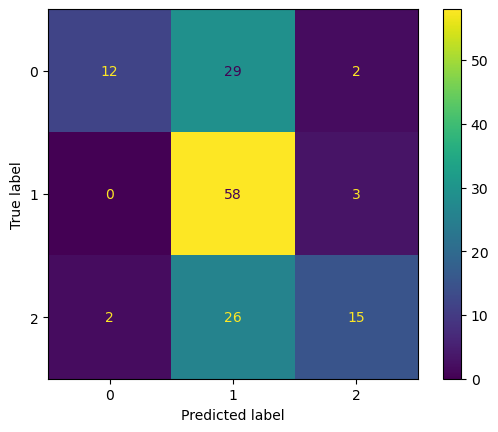

In [23]:
y_pred_test = gscv_dt_clf.predict(x_test)
plot_confusion_matrix(gscv_dt_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



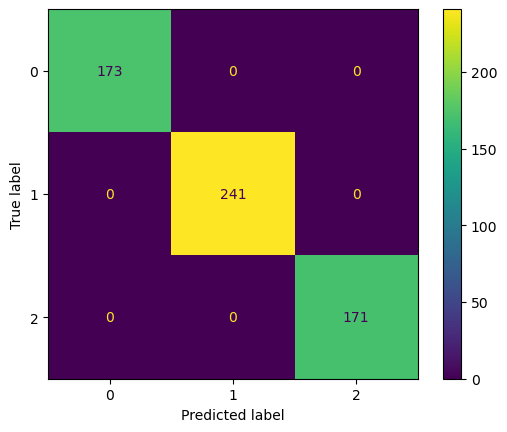

In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
model_details.append("logistic_regression")

y_pred_train = logistic_model.predict(x_train)
plot_confusion_matrix(logistic_model,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7687074829931972

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        36
           1       0.89      0.75      0.81        72
           2       0.70      0.77      0.73        39

    accuracy                           0.77       147
   macro avg       0.75      0.77      0.76       147
weighted avg       0.78      0.77      0.77       147



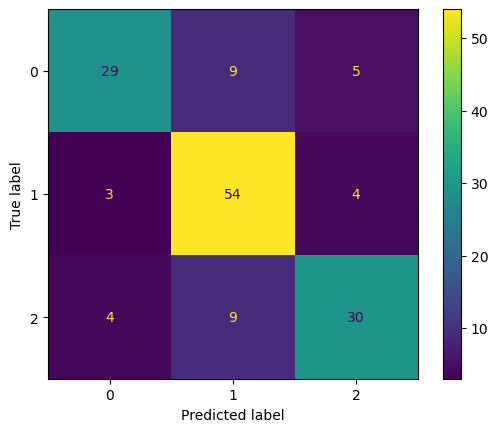

In [25]:
y_pred_test = logistic_model.predict(x_test)
plot_confusion_matrix(logistic_model,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [26]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)
model_details.append("Random Forest")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



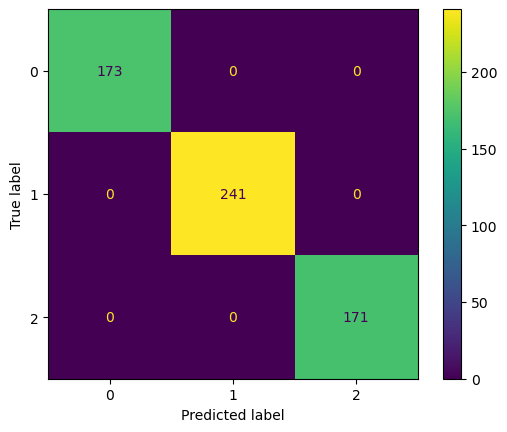

In [27]:
y_pred_train = rf_clf.predict(x_train)
plot_confusion_matrix(rf_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7346938775510204

              precision    recall  f1-score   support

           0       0.60      0.84      0.70        31
           1       0.92      0.67      0.78        83
           2       0.60      0.79      0.68        33

    accuracy                           0.73       147
   macro avg       0.71      0.77      0.72       147
weighted avg       0.78      0.73      0.74       147



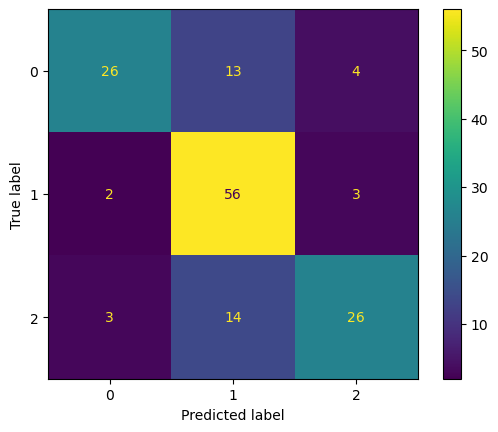

In [28]:
y_pred_test = rf_clf.predict(x_test)
plot_confusion_matrix(rf_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [29]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

rscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
rscv_rf_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
    

In [30]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=9, n_estimators=98,
                       oob_score=True, random_state=10)

In [31]:
rscv_rf_model.fit(x_train, y_train)
model_details.append("Random _Forest With Hyperparameter tuning")

0.5811965811965812

              precision    recall  f1-score   support

           0       0.28      0.96      0.44        51
           1       1.00      0.50      0.66       484
           2       0.29      1.00      0.45        50

    accuracy                           0.58       585
   macro avg       0.53      0.82      0.52       585
weighted avg       0.88      0.58      0.63       585



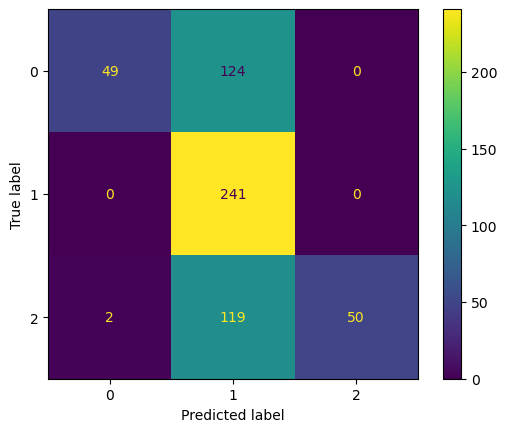

In [32]:
y_pred_train = rscv_rf_model.predict(x_train)
plot_confusion_matrix(rscv_rf_model,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.5306122448979592

              precision    recall  f1-score   support

           0       0.23      1.00      0.38        10
           1       1.00      0.47      0.64       129
           2       0.16      0.88      0.27         8

    accuracy                           0.53       147
   macro avg       0.47      0.78      0.43       147
weighted avg       0.90      0.53      0.60       147



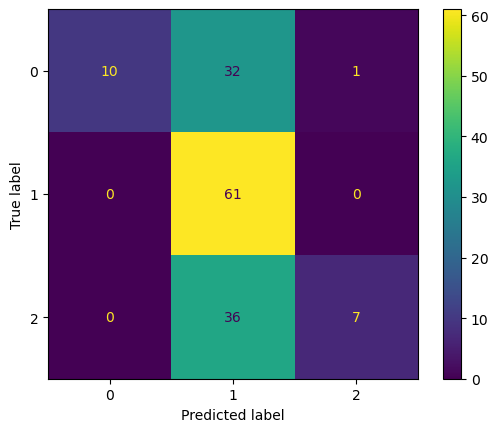

In [33]:
y_pred_test = rscv_rf_model.predict(x_test)
plot_confusion_matrix(rscv_rf_model,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [34]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
model_details.append("Knn_Model")

0.770940170940171

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       189
           1       0.80      0.76      0.78       254
           2       0.67      0.81      0.73       142

    accuracy                           0.77       585
   macro avg       0.77      0.78      0.77       585
weighted avg       0.78      0.77      0.77       585



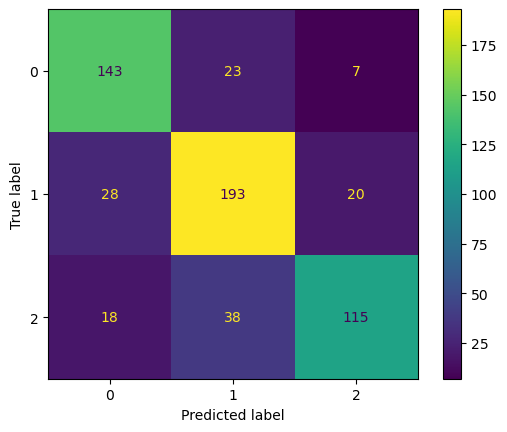

In [35]:
y_pred_train = knn_clf.predict(x_train)
plot_confusion_matrix(knn_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6190476190476191

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        50
           1       0.69      0.68      0.68        62
           2       0.49      0.60      0.54        35

    accuracy                           0.62       147
   macro avg       0.61      0.61      0.61       147
weighted avg       0.63      0.62      0.62       147



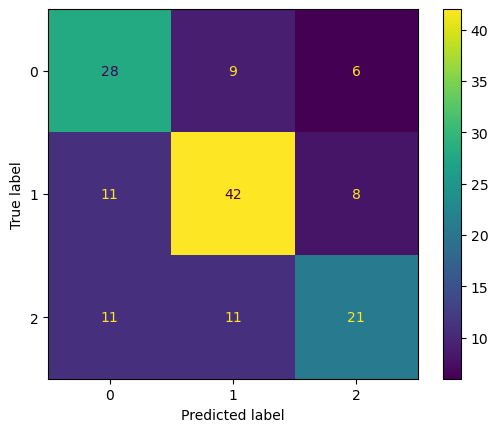

In [36]:
y_pred_test = knn_clf.predict(x_test)
plot_confusion_matrix(knn_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [37]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1) 
gscv_knn_clf.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [38]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [39]:
model_details.append("knn_model_with_Hyperparameter_Tuning")

0.811965811965812

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       215
           1       0.72      0.92      0.81       190
           2       0.86      0.82      0.84       180

    accuracy                           0.81       585
   macro avg       0.82      0.82      0.81       585
weighted avg       0.83      0.81      0.81       585



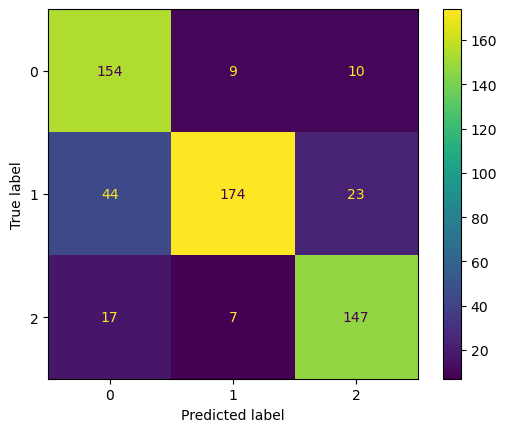

In [40]:
y_pred_train = gscv_knn_clf.predict(x_train)
plot_confusion_matrix(gscv_knn_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.6122448979591837

              precision    recall  f1-score   support

           0       0.70      0.49      0.58        61
           1       0.57      0.76      0.65        46
           2       0.58      0.62      0.60        40

    accuracy                           0.61       147
   macro avg       0.62      0.63      0.61       147
weighted avg       0.63      0.61      0.61       147



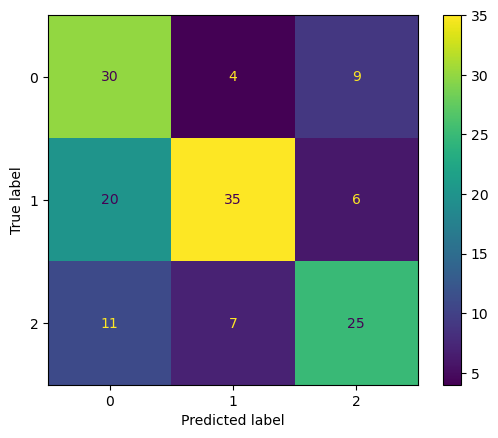

In [41]:
y_pred_test = gscv_knn_clf.predict(x_test)
plot_confusion_matrix(gscv_knn_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [42]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
model_details.append("SVM")

0.9863247863247864

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       169
           1       1.00      0.97      0.98       249
           2       0.98      1.00      0.99       167

    accuracy                           0.99       585
   macro avg       0.98      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585



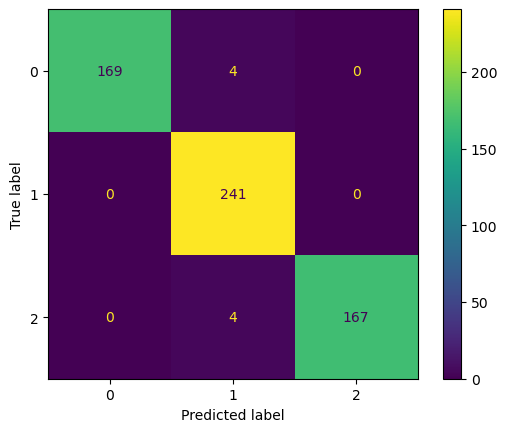

In [43]:
y_pred_train = svm_clf.predict(x_train)
plot_confusion_matrix(svm_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.673469387755102

              precision    recall  f1-score   support

           0       0.53      0.85      0.66        27
           1       0.93      0.59      0.72        97
           2       0.44      0.83      0.58        23

    accuracy                           0.67       147
   macro avg       0.64      0.76      0.65       147
weighted avg       0.78      0.67      0.69       147



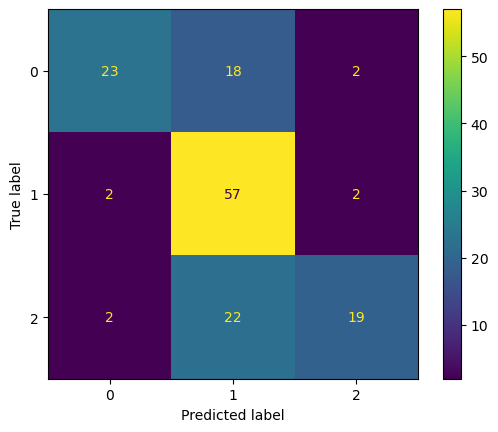

In [44]:
y_pred_test = svm_clf.predict(x_test)
plot_confusion_matrix(svm_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [45]:
svm_clf = SVC()
param_grid = {"C": np.arange(1,1000), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}  
rscv_svm = RandomizedSearchCV(svm_clf, param_grid, cv = 5, n_jobs=-1)
rscv_svm.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

In [46]:
rscv_svm.best_estimator_
rscv_svm.fit(x_train, y_train)
model_details.append("svm_hyperparameter_tunning")

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



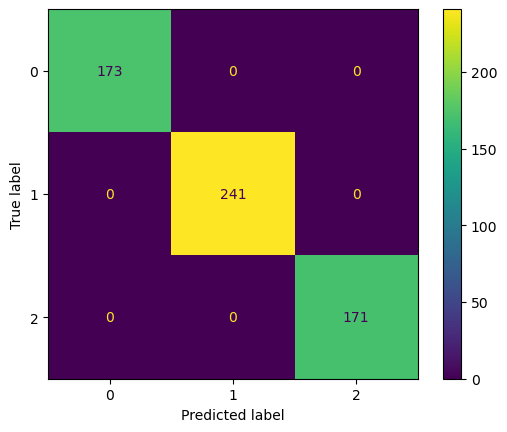

In [47]:
y_pred_train = rscv_svm.predict(x_train)
plot_confusion_matrix(rscv_svm,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy_list.append(accuracy)

0.7414965986394558

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        38
           1       0.84      0.74      0.78        69
           2       0.70      0.75      0.72        40

    accuracy                           0.74       147
   macro avg       0.73      0.74      0.73       147
weighted avg       0.75      0.74      0.74       147



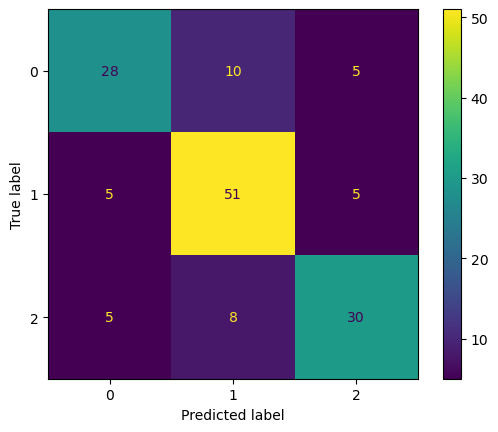

In [48]:
y_pred_test = rscv_svm.predict(x_test)
plot_confusion_matrix(rscv_svm,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy_list.append(accuracy)

In [49]:
# calculating accuracy

In [50]:
training_accuracy = []
testing_accuracy = []

In [51]:
tfidf_vect = TfidfVectorizer()
x = tfidf_vect.fit_transform(clean_text).toarray()
y = df["target"]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

0.9914529914529915

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       170
           1       1.00      0.98      0.99       246
           2       0.99      1.00      0.99       169

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585



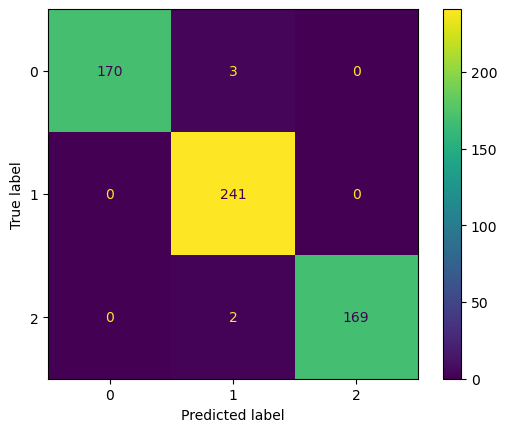

In [53]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

y_pred_train = logistic_model.predict(x_train)
plot_confusion_matrix(logistic_model,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)


0.6938775510204082

              precision    recall  f1-score   support

           0       0.53      0.82      0.65        28
           1       0.92      0.62      0.74        91
           2       0.53      0.82      0.65        28

    accuracy                           0.69       147
   macro avg       0.66      0.75      0.68       147
weighted avg       0.77      0.69      0.70       147



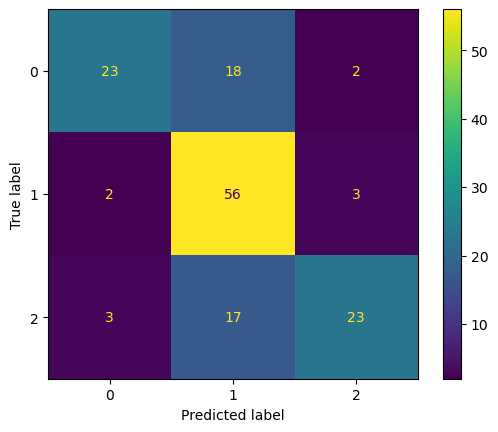

In [54]:
y_pred_test = logistic_model.predict(x_test)
plot_confusion_matrix(logistic_model,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [55]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



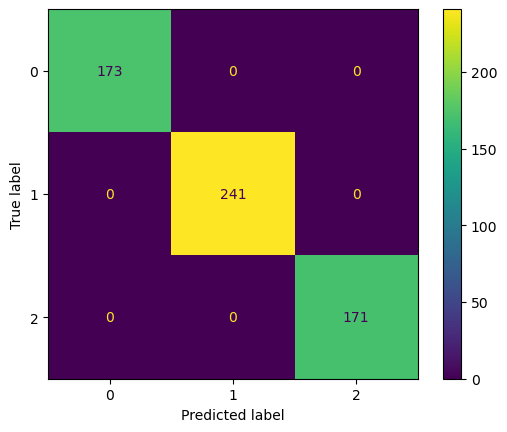

In [56]:
y_pred_train = dt_clf.predict(x_train)
plot_confusion_matrix(dt_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)


print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7210884353741497

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        39
           1       0.77      0.71      0.74        66
           2       0.72      0.74      0.73        42

    accuracy                           0.72       147
   macro avg       0.71      0.72      0.72       147
weighted avg       0.72      0.72      0.72       147



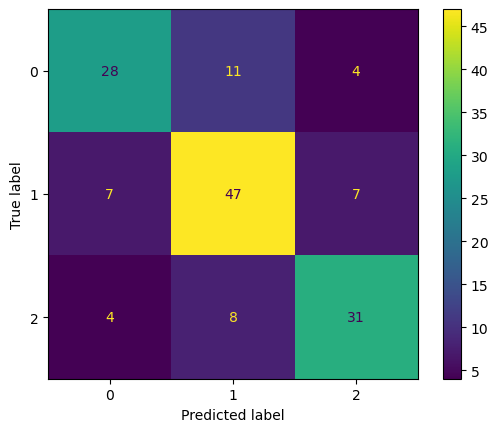

In [57]:
y_pred_test = dt_clf.predict(x_test)
plot_confusion_matrix(dt_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [58]:
dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [59]:
gscv_dt_clf.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10,
                       random_state=11)

0.6376068376068376

              precision    recall  f1-score   support

           0       0.36      0.95      0.52        65
           1       0.98      0.54      0.69       439
           2       0.44      0.94      0.60        81

    accuracy                           0.64       585
   macro avg       0.59      0.81      0.61       585
weighted avg       0.83      0.64      0.66       585



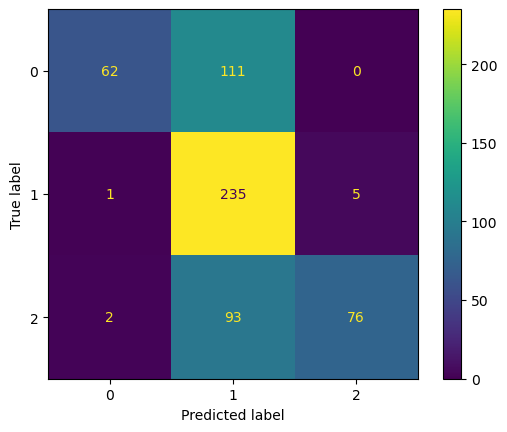

In [60]:
y_pred_train = gscv_dt_clf.predict(x_train)
plot_confusion_matrix(gscv_dt_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.5782312925170068

              precision    recall  f1-score   support

           0       0.28      0.92      0.43        13
           1       0.95      0.51      0.66       114
           2       0.35      0.75      0.48        20

    accuracy                           0.58       147
   macro avg       0.53      0.73      0.52       147
weighted avg       0.81      0.58      0.62       147



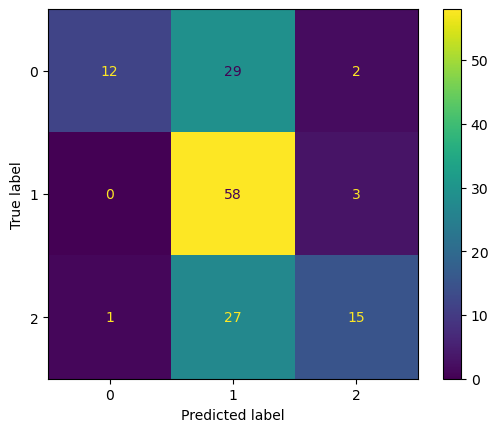

In [61]:
y_pred_test = gscv_dt_clf.predict(x_test)
plot_confusion_matrix(gscv_dt_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [62]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



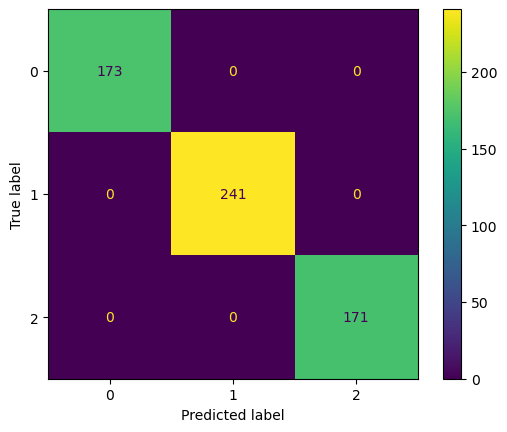

In [63]:
y_pred_train = rf_clf.predict(x_train)
plot_confusion_matrix(rf_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7074829931972789

              precision    recall  f1-score   support

           0       0.53      0.77      0.63        30
           1       0.93      0.65      0.77        88
           2       0.56      0.83      0.67        29

    accuracy                           0.71       147
   macro avg       0.68      0.75      0.69       147
weighted avg       0.78      0.71      0.72       147



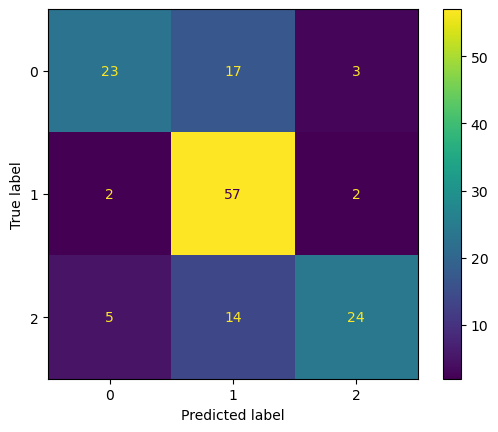

In [64]:
y_pred_test = rf_clf.predict(x_test)
plot_confusion_matrix(rf_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [65]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

rscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
rscv_rf_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
    

In [66]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=6,
                       n_estimators=102, oob_score=True, random_state=10)

0.4427350427350427

              precision    recall  f1-score   support

           0       0.08      1.00      0.14        13
           1       1.00      0.43      0.60       567
           2       0.03      1.00      0.06         5

    accuracy                           0.44       585
   macro avg       0.37      0.81      0.26       585
weighted avg       0.97      0.44      0.58       585



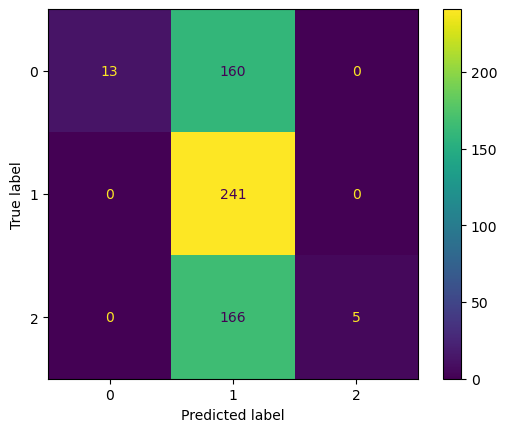

In [67]:
y_pred_train = rscv_rf_model.predict(x_train)
plot_confusion_matrix(rscv_rf_model,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.43537414965986393

              precision    recall  f1-score   support

           0       0.05      1.00      0.09         2
           1       1.00      0.42      0.60       144
           2       0.02      1.00      0.05         1

    accuracy                           0.44       147
   macro avg       0.36      0.81      0.24       147
weighted avg       0.98      0.44      0.58       147



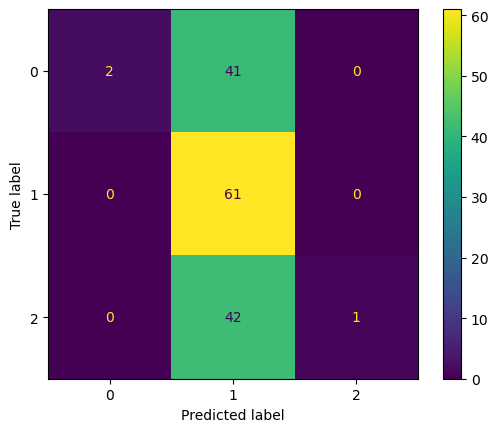

In [68]:
y_pred_test = rscv_rf_model.predict(x_test)
plot_confusion_matrix(rscv_rf_model,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [69]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

0.7794871794871795

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       202
           1       0.80      0.82      0.81       234
           2       0.71      0.81      0.76       149

    accuracy                           0.78       585
   macro avg       0.78      0.78      0.78       585
weighted avg       0.78      0.78      0.78       585



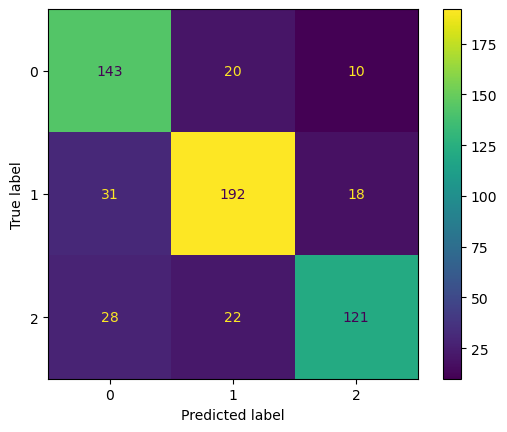

In [70]:
y_pred_train = knn_clf.predict(x_train)
plot_confusion_matrix(knn_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.6802721088435374

              precision    recall  f1-score   support

           0       0.72      0.55      0.63        56
           1       0.70      0.75      0.73        57
           2       0.60      0.76      0.68        34

    accuracy                           0.68       147
   macro avg       0.68      0.69      0.68       147
weighted avg       0.69      0.68      0.68       147



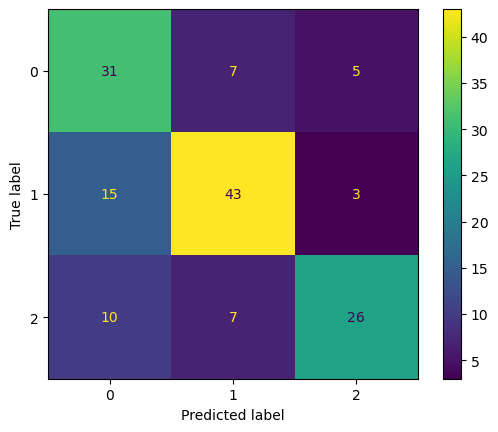

In [71]:
y_pred_test = knn_clf.predict(x_test)
plot_confusion_matrix(knn_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [72]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf, param_grid, cv = 5 , n_jobs = -1) 
gscv_knn_clf.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [73]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=17)

0.7401709401709402

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       182
           1       0.79      0.73      0.76       261
           2       0.65      0.79      0.72       142

    accuracy                           0.74       585
   macro avg       0.73      0.74      0.74       585
weighted avg       0.75      0.74      0.74       585



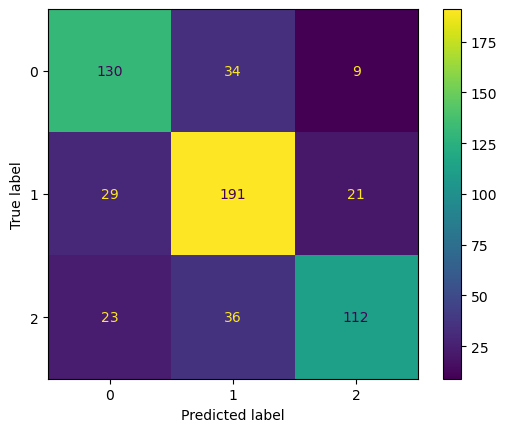

In [74]:
y_pred_train = gscv_knn_clf.predict(x_train)
plot_confusion_matrix(gscv_knn_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7210884353741497

              precision    recall  f1-score   support

           0       0.72      0.61      0.66        51
           1       0.82      0.79      0.81        63
           2       0.58      0.76      0.66        33

    accuracy                           0.72       147
   macro avg       0.71      0.72      0.71       147
weighted avg       0.73      0.72      0.72       147



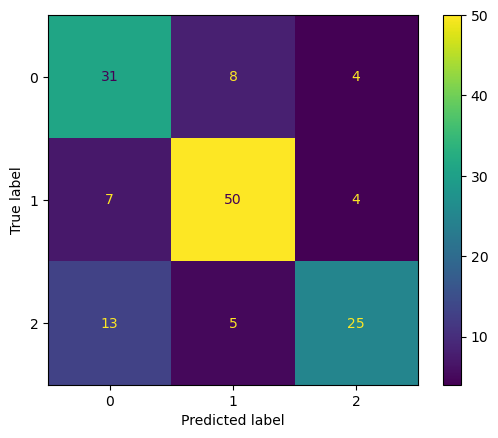

In [75]:
y_pred_test = gscv_knn_clf.predict(x_test)
plot_confusion_matrix(gscv_knn_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [76]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



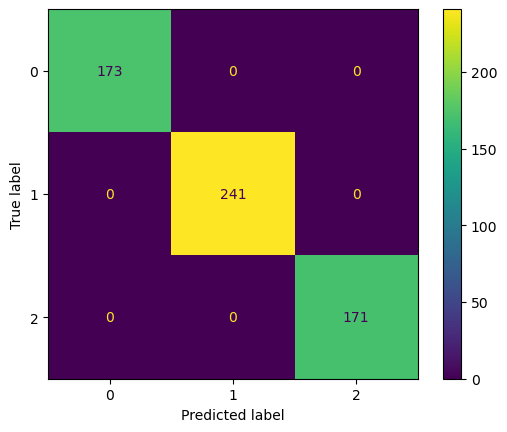

In [77]:
y_pred_train = svm_clf.predict(x_train)
plot_confusion_matrix(svm_clf,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.6530612244897959

              precision    recall  f1-score   support

           0       0.49      0.84      0.62        25
           1       0.97      0.57      0.72       103
           2       0.37      0.84      0.52        19

    accuracy                           0.65       147
   macro avg       0.61      0.75      0.62       147
weighted avg       0.81      0.65      0.68       147



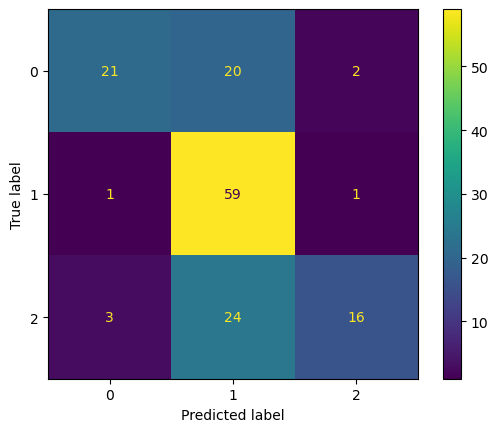

In [78]:
y_pred_test = svm_clf.predict(x_test)
plot_confusion_matrix(svm_clf,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [79]:
svm_clf = SVC()

param_grid = {"C": np.arange(1,1000), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}  
rscv_svm = RandomizedSearchCV(svm_clf, param_grid, cv = 5, n_jobs=-1)
rscv_svm.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

In [80]:
rscv_svm.best_estimator_
rscv_svm.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

In [81]:
rscv_svm.best_estimator_
rscv_svm.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  9...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       171

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



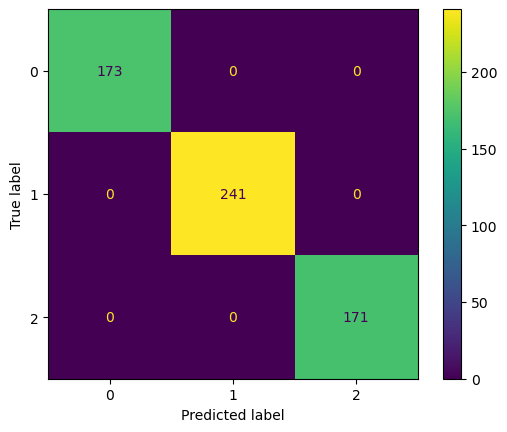

In [82]:
y_pred_train = rscv_svm.predict(x_train)
plot_confusion_matrix(rscv_svm,x_train,y_train)
accuracy =  accuracy_score(y_pred_train,y_train)
clf_report = classification_report(y_pred_train,y_train)

print(accuracy)
print()
print(clf_report)

training_accuracy.append(accuracy)

0.7482993197278912

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        35
           1       0.87      0.73      0.79        73
           2       0.70      0.77      0.73        39

    accuracy                           0.75       147
   macro avg       0.73      0.76      0.74       147
weighted avg       0.77      0.75      0.75       147



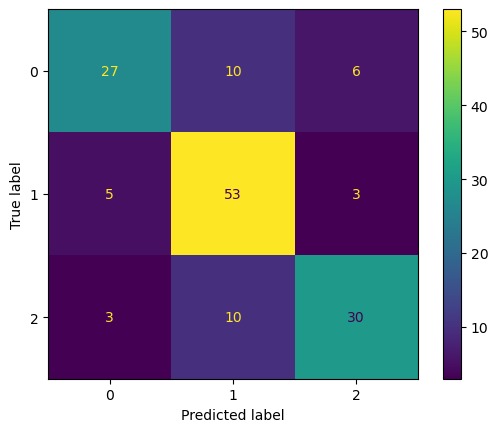

In [83]:
y_pred_test = rscv_svm.predict(x_test)
plot_confusion_matrix(rscv_svm,x_test,y_test)
accuracy =  accuracy_score(y_pred_test,y_test)
clf_report = classification_report(y_pred_test,y_test)

print(accuracy)
print()
print(clf_report)

testing_accuracy.append(accuracy)

In [84]:
comparison_df = pd.DataFrame({"Models": model_details, "count_v_Training Accuracy": training_accuracy_list,"count_v_Testing Accuracy": testing_accuracy_list,"tfidf_training_accuracy":training_accuracy,"tfidf_Testing Accuracy": testing_accuracy})
comparison_df

,Models,count_v_Training Accuracy,count_v_Testing Accuracy,tfidf_training_accuracy,tfidf_Testing Accuracy
0,Decision_Tree,1.000000,0.680272,0.991453,0.693878
1,Decision_Tree With Hyperparameter tuning,0.635897,0.578231,1.000000,0.721088
2,logistic_regression,1.000000,0.768707,0.637607,0.578231
3,Random Forest,1.000000,0.734694,1.000000,0.707483
4,Random _Forest With Hyperparameter tuning,0.581197,0.530612,0.442735,0.435374
5,Knn_Model,0.770940,0.619048,0.779487,0.680272
6,knn_model_with_Hyperparameter_Tuning,0.811966,0.612245,0.740171,0.721088
7,SVM,0.986325,0.673469,1.000000,0.653061
8,svm_hyperparameter_tunning,1.000000,0.741497,1.000000,0.748299


In [85]:
import pickle

pickle.dump(tfidf_vect,open("tfidf_model.pkl","wb"))

In [86]:
pickle.dump(gscv_knn_clf,open("model.pkl","wb"))